In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [344]:
df = pd.read_csv('dataset.csv')
df1 = pd.read_csv('dataset.csv')
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Data Cleaning

In [346]:
# Rename Column
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [347]:
# Feature selection
df.drop(df[['posted_on', 'area_locality', 'point_of_contact']],axis = 1, inplace = True)


In [348]:
# Feature engineering
df['floor'] = df['floor'].str.replace('Ground', '0')
df['floor'] = df['floor'].str.replace('Upper Basement', '-1')
df['floor'] = df['floor'].str.replace('Lower Basement', '-2')

df[['floor', 'total_floor']] = df['floor'].str.extract(r'^(.*?)\s+out\s+of\s+(.*?)$')

In [349]:
# NaN value from feature engineering
df[pd.isnull(df).any(axis=1)]

,bhk,rent,size,floor,area_type,city,furnishing_status,tenant_preferred,bathroom,total_floor
2553,2,20000,400,NaN,Super Area,Delhi,Unfurnished,Bachelors/Family,1,NaN
2883,1,18000,450,NaN,Carpet Area,Delhi,Furnished,Bachelors/Family,1,NaN
4490,3,15000,900,NaN,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,NaN
4560,3,15000,1270,NaN,Carpet Area,Hyderabad,Furnished,Family,2,NaN


In [350]:
# Remove 4 missing row
df.dropna(axis = 0, inplace = True)

In [351]:
# Fix data type
df[['floor', 'total_floor']] = df[['floor', 'total_floor']].astype('int64')

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bhk                4742 non-null   int64 
 1   rent               4742 non-null   int64 
 2   size               4742 non-null   int64 
 3   floor              4742 non-null   int64 
 4   area_type          4742 non-null   object
 5   city               4742 non-null   object
 6   furnishing_status  4742 non-null   object
 7   tenant_preferred   4742 non-null   object
 8   bathroom           4742 non-null   int64 
 9   total_floor        4742 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 407.5+ KB


In [353]:
# Divide feature
catfeat = df.select_dtypes(include = 'object').columns.to_list()
numfeat = df.select_dtypes(include = 'number').columns.to_list()

## EDA

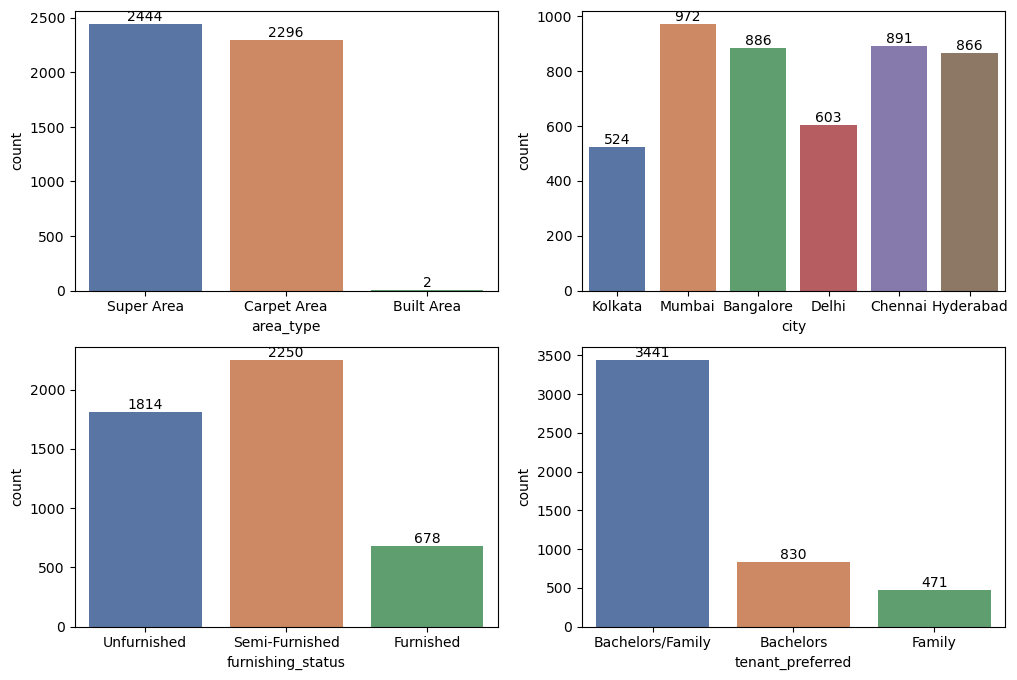

In [354]:
plt.figure(figsize = (12,8))

for i in catfeat :
    plt.subplot(2, 2, catfeat.index(i) + 1)
    ax = sns.countplot(data = df, x = df[i], palette='deep')
    ax.bar_label(ax.containers[0])

    
plt.show()

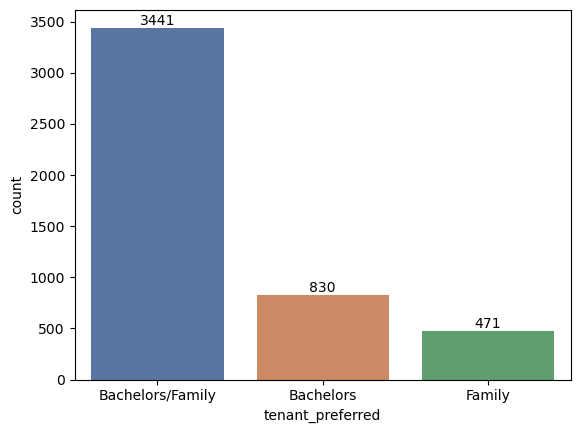

In [384]:
ax = sns.countplot(data = df, x = df['tenant_preferred'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

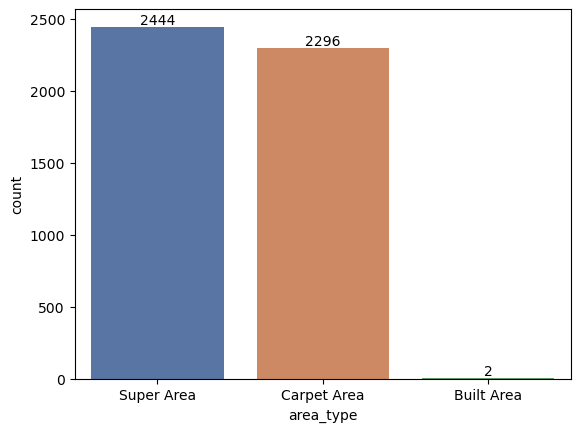

In [380]:
ax = sns.countplot(data = df, x = df['area_type'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

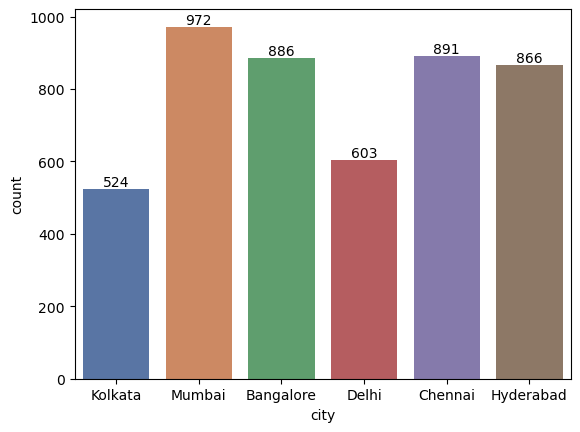

In [381]:
ax = sns.countplot(data = df, x = df['city'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

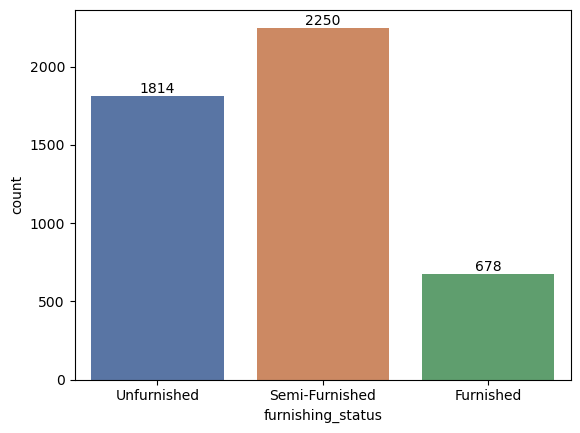

In [382]:
ax = sns.countplot(data = df, x = df['furnishing_status'], palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

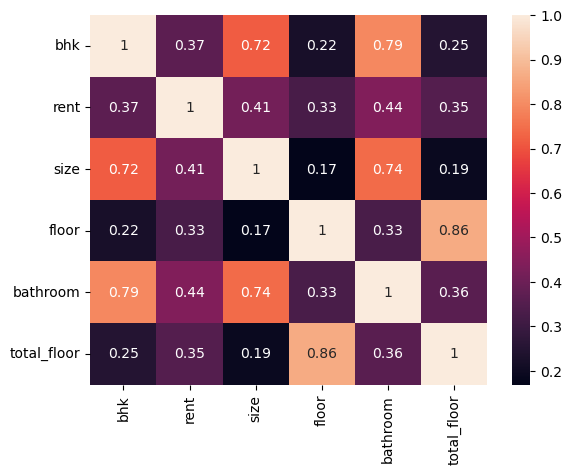

In [383]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Preprocessing

In [356]:
def oneh_encoding(df) :
    df_copy = df.copy()
    catcol = df_copy.select_dtypes('object').columns.to_list()
        
    df_copy = pd.get_dummies(df, columns = catcol)
    
    return df_copy

In [357]:
X = df.drop(columns = 'rent')
y = df['rent']

In [358]:
# Normalization, because the data distribution isn't normal distribution
catfeat = X.select_dtypes(include = 'object').columns.to_list()
numfeat = X.select_dtypes(include = 'number').columns.to_list()

X_cat = X[catfeat]
X_num = X[numfeat]

scaler = MinMaxScaler()

scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)

X_cat = oneh_encoding(X_cat)

X_cat = X_cat.reset_index(drop=True)
X_num_scaled = X_num_scaled.reset_index(drop=True)

X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)


In [371]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size = .25)

## Modeling

In [372]:
def benchmark(model):
  lr = model
  lr.fit(X_train, y_train)

  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)

  print('For training data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_train, y_train_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_train, y_train_pred)))
  print("R2 Score: {:.2f} \n".format(r2_score(y_train, y_train_pred)))

  print('For testing data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_test_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
  print("R2 Score: {:.2f}".format(r2_score(y_test, y_test_pred)))

In [373]:
benchmark(LinearRegression())

For training data ---------
Mean Absolute Error: 23814.95
Mean Squared Error: 5104535469.64
R2 Score: 0.29 

For testing data ---------
Mean Absolute Error: 21761.05
Mean Squared Error: 1302137656.11
R2 Score: 0.52


In [374]:
benchmark(DecisionTreeRegressor())

For training data ---------
Mean Absolute Error: 174.84
Mean Squared Error: 670500.15
R2 Score: 1.00 

For testing data ---------
Mean Absolute Error: 13651.63
Mean Squared Error: 1068197348.72
R2 Score: 0.60


In [375]:
benchmark(KNeighborsRegressor())

For training data ---------
Mean Absolute Error: 13081.81
Mean Squared Error: 3784616856.58
R2 Score: 0.48 

For testing data ---------
Mean Absolute Error: 14336.78
Mean Squared Error: 2157675758.94
R2 Score: 0.20
